In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Controllers errors dataset of the simulation

The controllerError.csv is a file that contains the dataset of the errors of fifteen simulation tests of the autonomous landing process of a drone on a landing platform. Three controllers were tested (P Proportional, PI Proportinal-Integral, PID Proportinal-Integral-Derivative), five times each, to determine which of them have a better performance.

In the dataset each controller was tested five times, the dataset must have four columns per test (timestamp, errors in X, Y and angle), each test is named as its controller and numerate from 1 to 5, for example *P1_error_X* makes reference to the error in X of first test of the controller P.

In [2]:
error_file = "./data/controllerError.csv"
data = pd.read_csv(error_file)

The _controller_times_ dictionary contains the duration time of the simulation for each landing process.

In [3]:
controller_times = {}

with open("./data/testTime.csv", "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    for row in csv_reader:
        controller_times[row[0]] = float(row[1])

print(controller_times)


{'P1': 25.22, 'P2': 30.98, 'P3': 32.34, 'P4': 29.62, 'P5': 21.12, 'PI1': 35.63, 'PI2': 30.81, 'PI3': 44.82, 'PI4': 35.92, 'PI5': 43.0, 'PID1': 25.32, 'PID2': 26.62, 'PID3': 32.28, 'PID4': 17.16, 'PID5': 61.12}


In [4]:
print("Data size:", data.shape)
print("Data Columns:", data.columns)

Data size: (773, 60)
Data Columns: Index(['P1_time_percent', 'P1_error_X', 'P1_error_Y', 'P1_error_Angle',
       'P2_time_percent', 'P2_error_X', 'P2_error_Y', 'P2_error_Angle',
       'P3_time_percent', 'P3_error_X', 'P3_error_Y', 'P3_error_Angle',
       'P4_time_percent', 'P4_error_X', 'P4_error_Y', 'P4_error_Angle',
       'P5_time_percent', 'P5_error_X', 'P5_error_Y', 'P5_error_Angle',
       'PI1_time_percent', 'PI1_error_X', 'PI1_error_Y', 'PI1_error_Angle',
       'PI2_time_percent', 'PI2_error_X', 'PI2_error_Y', 'PI2_error_Angle',
       'PI3_time_percent', 'PI3_error_X', 'PI3_error_Y', 'PI3_error_Angle',
       'PI4_time_percent', 'PI4_error_X', 'PI4_error_Y', 'PI4_error_Angle',
       'PI5_time_percent', 'PI5_error_X', 'PI5_error_Y', 'PI5_error_Angle',
       'PID1_time_percent', 'PID1_error_X', 'PID1_error_Y', 'PID1_error_Angle',
       'PID2_time_percent', 'PID2_error_X', 'PID2_error_Y', 'PID2_error_Angle',
       'PID3_time_percent', 'PID3_error_X', 'PID3_error_Y', 'PID3

In [5]:
data

,P1_time_percent,P1_error_X,P1_error_Y,P1_error_Angle,P2_time_percent,P2_error_X,P2_error_Y,P2_error_Angle,P3_time_percent,P3_error_X,P3_error_Y,P3_error_Angle,P4_time_percent,P4_error_X,P4_error_Y,P4_error_Angle,P5_time_percent,P5_error_X,P5_error_Y,P5_error_Angle,PI1_time_percent,PI1_error_X,PI1_error_Y,PI1_error_Angle,PI2_time_percent,PI2_error_X,PI2_error_Y,PI2_error_Angle,PI3_time_percent,PI3_error_X,PI3_error_Y,PI3_error_Angle,PI4_time_percent,PI4_error_X,PI4_error_Y,PI4_error_Angle,PI5_time_percent,PI5_error_X,PI5_error_Y,PI5_error_Angle,PID1_time_percent,PID1_error_X,PID1_error_Y,PID1_error_Angle,PID2_time_percent,PID2_error_X,PID2_error_Y,PID2_error_Angle,PID3_time_percent,PID3_error_X,PID3_error_Y,PID3_error_Angle,PID4_time_percent,PID4_error_X,PID4_error_Y,PID4_error_Angle,PID5_time_percent,PID5_error_X,PID5_error_Y,PID5_error_Angle
0,2.797133e+12,-1.405518,-8.175034,25.724314,2.800141e+12,1.832184,0.280548,14.825175,2.788721e+12,-9.602631,4.345184,18.380262,2.795133e+12,-8.240295,10.613800,11.969267,2.802277e+12,7.823944,0.777039,24.291937,2.805825e+12,-4.425323,0.226944,16.131605,2.824481e+12,7.324158,3.919937,24.735077,2.789281e+12,-4.753326,14.623001,15.267820,2.811645e+12,5.264343,-2.558167,24.632563,2.791069e+12,-4.666412,5.361191,17.938175,2.809713e+12,1.847626,-3.631516,20.501625,2.801149e+12,6.265594,-0.900116,20.456829,2.811945e+12,3.908997,1.089706,21.135937,2.808553e+12,-24.528473,9.493790,20.610846,2793073000000,-13.245575,3.215363,22.271799
1,2.797133e+12,-1.561249,-7.909058,25.972363,2.800141e+12,1.011841,0.163513,14.748403,2.788721e+12,-10.378113,4.035660,18.287497,2.795249e+12,-7.554230,9.782501,13.522895,2.802365e+12,7.999420,0.982330,24.245625,2.805829e+12,-5.443024,0.507767,17.409170,2.824641e+12,7.154694,4.001129,24.708035,2.789393e+12,-5.247223,14.583420,15.210352,2.811645e+12,4.511139,-3.092514,25.175207,2.791189e+12,-4.645599,4.289398,19.104132,2.809821e+12,1.248169,-4.548126,21.483149,2.801249e+12,6.389252,-0.785782,20.484976,2.812029e+12,3.834351,1.173721,21.151783,2.808653e+12,-24.880463,8.951950,20.513208,2793073000000,-13.394470,3.019852,21.856157
2,2.797257e+12,-1.104095,-7.745956,25.452087,2.800253e+12,1.072632,0.081894,14.752409,2.788809e+12,-10.373230,3.611526,18.271057,2.795249e+12,-8.079498,9.661362,14.075497,2.802449e+12,8.174866,1.187607,24.199314,2.805985e+12,-4.042053,0.242004,18.532791,2.824741e+12,6.654358,3.989258,24.730976,2.789489e+12,-5.741150,14.543854,15.152884,2.811745e+12,4.501404,-3.046143,25.187534,2.791281e+12,-4.638245,3.928009,19.250013,2.809917e+12,0.861420,-3.958984,21.216505,2.801345e+12,6.324799,-0.660034,20.393955,2.812121e+12,3.759705,1.257751,21.167627,2.808749e+12,-24.629242,9.523132,20.780157,2793177000000,-12.394012,3.000198,21.392118
3,2.797337e+12,-0.251465,-8.269760,24.777081,2.800361e+12,1.765961,-0.280014,14.207507,2.788889e+12,-9.974121,3.633575,17.924551,2.795381e+12,-8.508911,9.234436,14.037944,2.802533e+12,8.445343,2.041641,27.351805,2.806141e+12,-3.745331,0.031738,18.652405,2.824741e+12,6.015717,3.974533,23.903347,2.789581e+12,-5.592194,13.063980,16.036392,2.811837e+12,4.466675,-4.884079,26.108200,2.791417e+12,-4.630920,3.566620,19.395893,2.810033e+12,1.599274,-4.045914,21.499990,2.801441e+12,6.432129,-0.544708,20.415680,2.812205e+12,3.856171,0.760941,21.357243,2.808861e+12,-24.929474,9.076874,20.702108,2793277000000,-12.237396,2.281097,21.505480
4,2.797337e+12,-0.576721,-8.209625,25.760311,2.800469e+12,2.429047,0.503555,11.470929,2.788889e+12,-9.528259,4.386703,17.862976,2.795509e+12,-8.938354,8.807495,14.000390,2.802533e+12,7.782043,2.376450,26.565727,2.806237e+12,-3.801910,-0.131958,19.031105,2.824825e+12,5.779053,4.039993,23.835228,2.789681e+12,-6.468170,11.618713,16.271736,2.811937e+12,4.348724,-3.280060,26.182190,2.791517e+12,-4.623566,3.205231,19.541773,2.810133e+12,1.944672,-2.807617,21.649691,2.801541e+12,5.616364,0.121689,20.319523,2.812321e+12,3.795197,0.798569,21.381308,2.808945e+12,-22.255127,7.182999,20.263893,2793397000000,-12.1

Calculate the time for each sample given the total time of each test and the timestamp of the simulation (time_percent in the dataset), knowing that the relationship between the duration time of the test and the timestamp is linear. It important to notice that the starting point of the duration time of the test is zero.

$\displaystyle m = \frac{time_{total}}{timestamp_n-timestamp_0}$ where $timestamp_0$ is the first value of the timestamps, $timestamp_n$ is the last value of the timestamps and $total time$ is the duration of the test.

$\displaystyle b = m.timestamp_n + time_{total}$

The linear relantionship between the timestamp ant the duration time of the tests is :
$\displaystyle time = m.timestamp + b$

In [6]:
for test, test_time in controller_times.items():    

    first_val_tstamp = data[test+"_time_percent"][0]
    last_val_tstamp = data[test+"_time_percent"][data.apply(lambda column: column.dropna().index[-1])[test+"_time_percent"]]
    
    m = test_time / (last_val_tstamp - first_val_tstamp)
    b = test_time - m * last_val_tstamp
    
    data[test+"_time"] = m * data[test+"_time_percent"] + b
    
#    last_time = data[test+"_time"][data.apply(lambda column: column.dropna().index[-1])[test+"_time"]]
#    print(test, test_time, last_time)

data = data.reindex(columns=sorted(data.columns))

    
# data.apply(lambda column: column.dropna().index[-1])["P1_time_percent"] #Get last non NaN value of a column



In [7]:
data

,P1_error_Angle,P1_error_X,P1_error_Y,P1_time,P1_time_percent,P2_error_Angle,P2_error_X,P2_error_Y,P2_time,P2_time_percent,P3_error_Angle,P3_error_X,P3_error_Y,P3_time,P3_time_percent,P4_error_Angle,P4_error_X,P4_error_Y,P4_time,P4_time_percent,P5_error_Angle,P5_error_X,P5_error_Y,P5_time,P5_time_percent,PI1_error_Angle,PI1_error_X,PI1_error_Y,PI1_time,PI1_time_percent,PI2_error_Angle,PI2_error_X,PI2_error_Y,PI2_time,PI2_time_percent,PI3_error_Angle,PI3_error_X,PI3_error_Y,PI3_time,PI3_time_percent,PI4_error_Angle,PI4_error_X,PI4_error_Y,PI4_time,PI4_time_percent,PI5_error_Angle,PI5_error_X,PI5_error_Y,PI5_time,PI5_time_percent,PID1_error_Angle,PID1_error_X,PID1_error_Y,PID1_time,PID1_time_percent,PID2_error_Angle,PID2_error_X,PID2_error_Y,PID2_time,PID2_time_percent,PID3_error_Angle,PID3_error_X,PID3_error_Y,PID3_time,PID3_time_percent,PID4_error_Angle,PID4_error_X,PID4_error_Y,PID4_time,PID4_time_percent,PID5_error_Angle,PID5_error_X,PID5_error_Y,PID5_time,PID5_time_percent
0,25.724314,-1.405518,-8.175034,-4.547474e-13,2.797133e+12,14.825175,1.832184,0.280548,0.000000,2.800141e+12,18.380262,-9.602631,4.345184,0.000000,2.788721e+12,11.969267,-8.240295,10.613800,0.000000,2.795133e+12,24.291937,7.823944,0.777039,0.000000,2.802277e+12,16.131605,-4.425323,0.226944,0.000000,2.805825e+12,24.735077,7.324158,3.919937,0.000000,2.824481e+12,15.267820,-4.753326,14.623001,0.000000,2.789281e+12,24.632563,5.264343,-2.558167,0.000000,2.811645e+12,17.938175,-4.666412,5.361191,0.000000,2.791069e+12,20.501625,1.847626,-3.631516,0.000000,2.809713e+12,20.456829,6.265594,-0.900116,0.000000,2.801149e+12,21.135937,3.908997,1.089706,0.000000,2.811945e+12,20.610846,-24.528473,9.493790,-4.547474e-13,2.808553e+12,22.271799,-13.245575,3.215363,0.000000,2793073000000
1,25.972363,-1.561249,-7.909058,-4.547474e-13,2.797133e+12,14.748403,1.011841,0.163513,0.000000,2.800141e+12,18.287497,-10.378113,4.035660,0.000000,2.788721e+12,13.522895,-7.554230,9.782501,0.127901,2.795249e+12,24.245625,7.999420,0.982330,0.105194,2.802365e+12,17.409170,-5.443024,0.507767,0.004253,2.805829e+12,24.708035,7.154694,4.001129,0.169822,2.824641e+12,15.210352,-5.247223,14.583420,0.117396,2.789393e+12,25.175207,4.511139,-3.092514,0.000000,2.811645e+12,19.104132,-4.645599,4.289398,0.126161,2.791189e+12,21.483149,1.248169,-4.548126,0.115695,2.809821e+12,20.484976,6.389252,-0.785782,0.112378,2.801249e+12,21.151783,3.834351,1.173721,0.089690,2.812029e+12,20.513208,-24.880463,8.951950,1.181493e-01,2.808653e+12,21.856157,-13.394470,3.019852,0.000000,2793073000000
2,25.452087,-1.104095,-7.745956,1.524907e-01,2.797257e+12,14.752409,1.072632,0.081894,0.120078,2.800253e+12,18.271057,-10.373230,3.611526,0.097263,2.788809e+12,14.075497,-8.079498,9.661362,0.127901,2.795249e+12,24.199314,8.174866,1.187607,0.205606,2.802449e+12,18.532791,-4.042053,0.242004,0.170133,2.805985e+12,24.730976,6.654358,3.989258,0.275961,2.824741e+12,15.152884,-5.741150,14.543854,0.218021,2.789489e+12,25.187534,4.501404,-3.046143,0.106285,2.811745e+12,19.250013,-4.638245,3.928009,0.222885,2.791281e+12,21.216505,0.861420,-3.958984,0.218534,2.809917e+12,20.393955,6.324799,-0.660034,0.220260,2.801345e+12,21.167627,3.759705,1.257751,0.187923,2.812121e+12,20.780157,-24.629242,9.523132,2.315726e-01,2.808749e+12,21.392118,-12.394012,3.000198,0.111299,2793177000000
3,24.777081,-0.251465,-8.269760,2.508719e-01,2.797337e+12,14.207507,1.765961,-0.280014,0.235867,2.800361e+12,17.924551,-9.974121,3.633575,0.185684,2.788889e+12,14.037944,-8.508911,9.234436,0.273443,2.795381e+12,27.351805,8.445343,2.041641,0.306018,2.802533e+12,18.652405,-3.745331,0.031738,0.336012,2.806141e+12,23.903347,6.015717,3.974533,0.275961,2.824741e+12,16.036392,-5.592194,13.063980,0.314453,2.789581e+12,26.108200,4.466675,-4.884079,0.204067,2.811837e+12,19.395893,-4.630920,3.566620,0.365868,2.791417e+12,21.499990,1.599274,-4.045914,0.342799,2.810033e+12,20.415680,6.432129,-0.544708,0.328143,2.801441e+12,21.357243,3.856171,0.760941,0.277613,2.812205e+12,20.7021

## Which controller is better?
The five results obtained for each controller will be graphed and the best result per controller will be chosen to compare the three controllers and decide which of them has the best performance for the landing process.

### Organizing the data to plot the controllers

In [8]:
controllers = pd.DataFrame(columns=["Time", "Controller", "Error_X", "Error_Y", "Error_Angle"])

for test in controller_times:
    control = pd.DataFrame(columns=["Time", "Controller", "Error_X", "Error_Y", "Error_Angle"])
    row_num = data.apply(lambda column: column.dropna().index[-1])[test+"_time"]
    
    control["Time"] = data[test+"_time"][0:row_num+1]
    control["Error_X"] = data[test+"_error_X"][0:row_num+1]
    control["Error_Y"] = data[test+"_error_Y"][0:row_num+1]
    control["Error_Angle"] = data[test+"_error_Angle"][0:row_num+1]
    control["Controller"] = test
    
    controllers = controllers.append(control, ignore_index = True)

    del control

controllers

,Time,Controller,Error_X,Error_Y,Error_Angle
0,-4.547474e-13,P1,-1.405518,-8.175034,25.724314
1,-4.547474e-13,P1,-1.561249,-7.909058,25.972363
2,1.524907e-01,P1,-1.104095,-7.745956,25.452087
3,2.508719e-01,P1,-0.251465,-8.269760,24.777081
4,2.508719e-01,P1,-0.576721,-8.209625,25.760311
...,...,...,...,...,...
6164,6.071333e+01,PID5,24.641052,-17.033295,-0.617772
6165,6.071333e+01,PID5,22.645752,-17.076019,-0.071432
6166,6.084603e+01,PID5,23.654877,-17.565918,-0.493894
6167,6.097874e+01,PID5,21.604095,-17.655060,0.004020


### Error graphs for controller P

In [9]:
controller_P = controllers[
    (controllers.Controller == "P1") |
    (controllers.Controller == "P2") |
    (controllers.Controller == "P3") |
    (controllers.Controller == "P4") |
    (controllers.Controller == "P5")
].copy()
controller_P

,Time,Controller,Error_X,Error_Y,Error_Angle
0,-4.547474e-13,P1,-1.405518,-8.175034,25.724314
1,-4.547474e-13,P1,-1.561249,-7.909058,25.972363
2,1.524907e-01,P1,-1.104095,-7.745956,25.452087
3,2.508719e-01,P1,-0.251465,-8.269760,24.777081
4,2.508719e-01,P1,-0.576721,-8.209625,25.760311
...,...,...,...,...,...
1636,2.085702e+01,P5,14.025818,-9.678635,-1.204759
1637,2.097177e+01,P5,15.259521,-9.690826,-1.344162
1638,2.097177e+01,P5,15.919067,-9.147141,-1.444376
1639,2.110566e+01,P5,15.538971,-9.175201,-1.769146


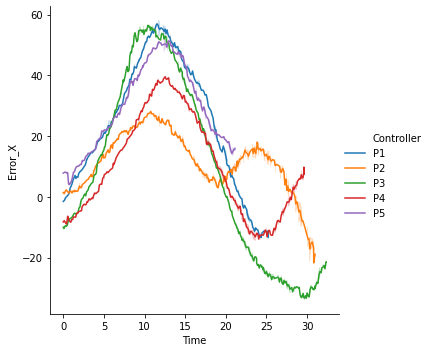

In [10]:
sns.relplot(x="Time", y="Error_X", hue="Controller",
            kind="line", ci="sd",data=controller_P)

### Error graphs for controller PI

In [11]:
controller_PI = controllers[
    (controllers.Controller == "PI1") |
    (controllers.Controller == "PI2") |
    (controllers.Controller == "PI3") |
    (controllers.Controller == "PI4") |
    (controllers.Controller == "PI5")
].copy()
controller_PI

,Time,Controller,Error_X,Error_Y,Error_Angle
1641,0.000000,PI1,-4.425323,0.226944,16.131605
1642,0.004253,PI1,-5.443024,0.507767,17.409170
1643,0.170133,PI1,-4.042053,0.242004,18.532791
1644,0.336012,PI1,-3.745331,0.031738,18.652405
1645,0.438091,PI1,-3.801910,-0.131958,19.031105
...,...,...,...,...,...
4132,42.676186,PI5,-28.304138,6.228409,-0.781980
4133,42.781320,PI5,-23.702606,7.854172,-0.841115
4134,42.781320,PI5,-24.220947,6.819061,-0.270501
4135,42.886455,PI5,-21.021118,8.151016,-0.403469


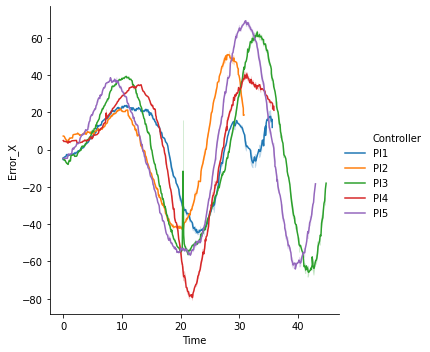

In [12]:
sns.relplot(x="Time", y="Error_X", hue="Controller",
            kind="line", ci="sd",data=controller_PI)

### Error graphs for controller PI

In [13]:
controller_PID = controllers[
    (controllers.Controller == "PID1") |
    (controllers.Controller == "PID2") |
    (controllers.Controller == "PID3") |
    (controllers.Controller == "PID4") |
    (controllers.Controller == "PID5")
].copy()
controller_PID

,Time,Controller,Error_X,Error_Y,Error_Angle
4137,0.000000,PID1,1.847626,-3.631516,20.501625
4138,0.115695,PID1,1.248169,-4.548126,21.483149
4139,0.218534,PID1,0.861420,-3.958984,21.216505
4140,0.342799,PID1,1.599274,-4.045914,21.499990
4141,0.449924,PID1,1.944672,-2.807617,21.649691
...,...,...,...,...,...
6164,60.713332,PID5,24.641052,-17.033295,-0.617772
6165,60.713332,PID5,22.645752,-17.076019,-0.071432
6166,60.846034,PID5,23.654877,-17.565918,-0.493894
6167,60.978737,PID5,21.604095,-17.655060,0.004020


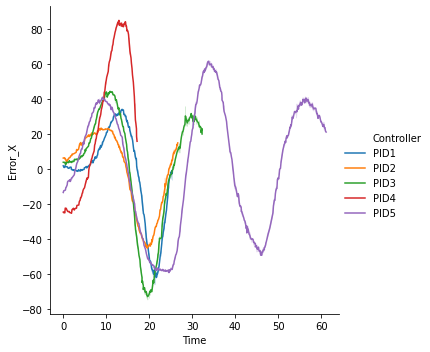

In [14]:
sns.relplot(x="Time", y="Error_X", hue="Controller",
            kind="line", ci="sd",data=controller_PID)